In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.applications.vgg19 import VGG19, preprocess_input , decode_predictions

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator , img_to_array , load_img

In [ ]:
#EXPLORATORY DATA ANALYTICS
os.listdir("/content/drive/MyDrive/data/Plant Diseases Dataset/Plant Diseases Dataset/train")

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___healthy',
 'Apple___Cedar_apple_rust',
 'Cherry_(including_sour)___healthy',
 'Grape___Black_rot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Blueberry___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Cherry_(including_sour)___Powdery_mildew',
 'Grape___healthy',
 'Grape___Esca_(Black_Measles)',
 'Peach___Bacterial_spot',
 'Potato___healthy',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Pepper,_bell___Bacterial_spot',
 'Peach___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Bacterial_spot',
 'Soybean___healthy',
 'Tomato___Early_blight',
 'Squash___Powdery_mildew',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Toma

In [ ]:
len(os.listdir("/content/drive/MyDrive/data/Plant Diseases Dataset/Plant Diseases Dataset/train"))

38

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.5,shear_range=0.3, horizontal_flip=True, preprocessing_function=preprocess_input)

In [ ]:
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/data/Plant Diseases Dataset/Plant Diseases Dataset/train", target_size=(256,256),batch_size=32)
val = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/data/Plant Diseases Dataset/Plant Diseases Dataset/valid", target_size=(256,256),batch_size=32)

Found 70312 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
t_img , label = train.next()

In [ ]:
t_img.shape

(32, 256, 256, 3)

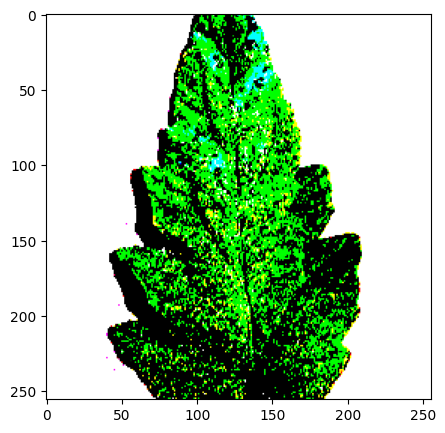

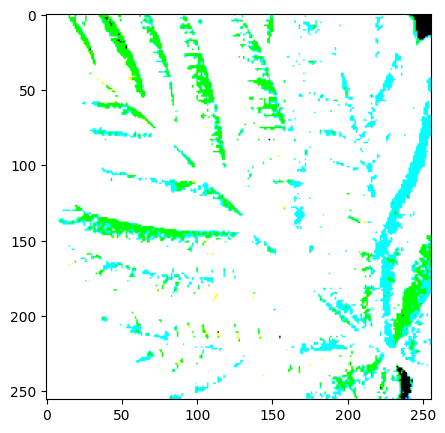

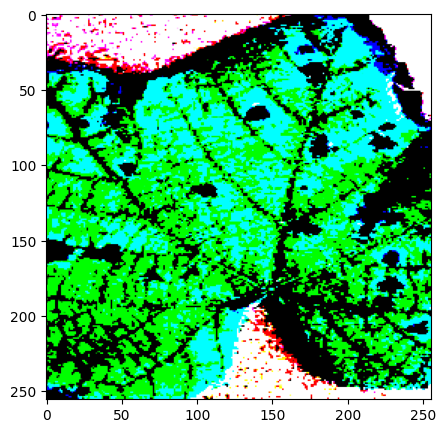

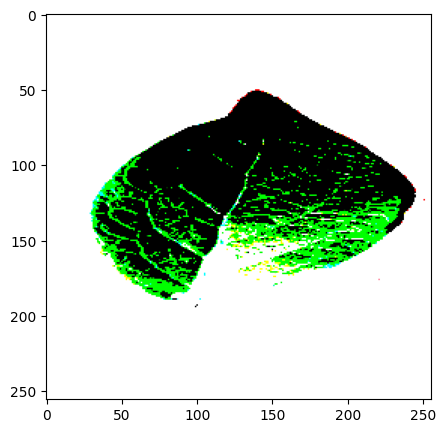

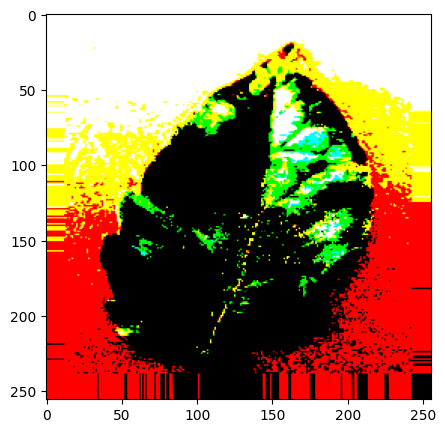

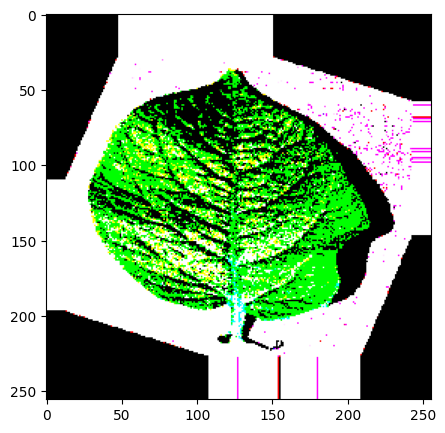

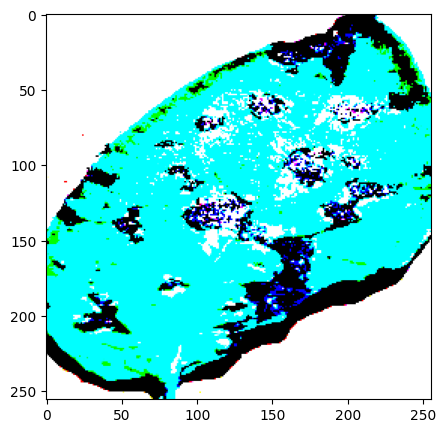

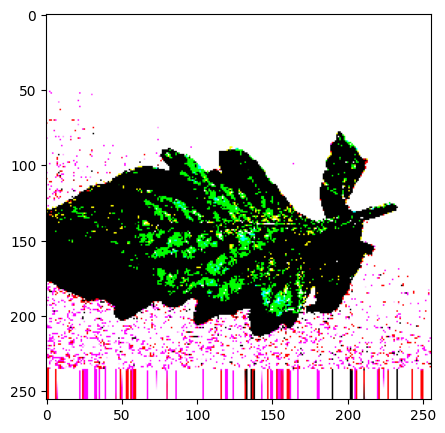

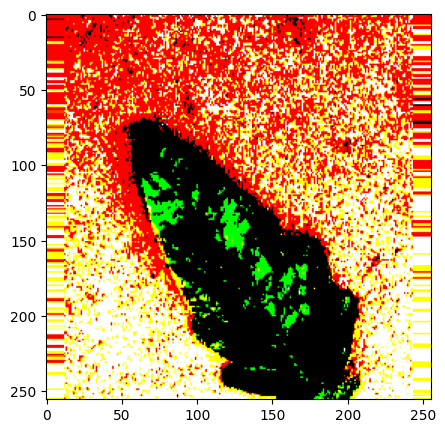

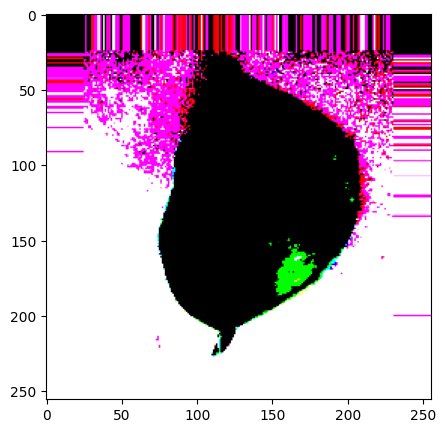

In [ ]:
def plotImage(img_arr,label):
  for im, l in zip(img_arr , label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

plotImage(t_img[:10], label[:10])

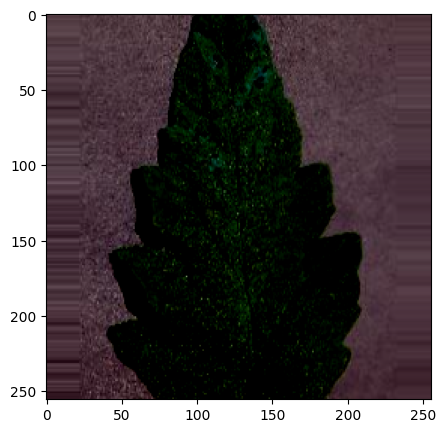

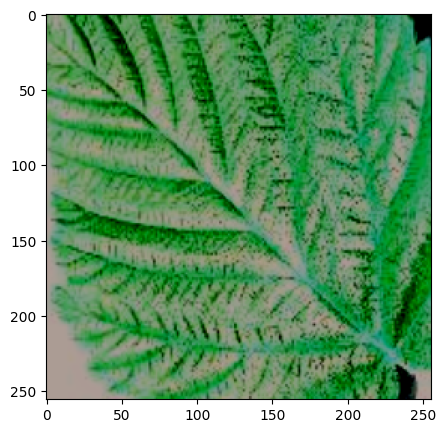

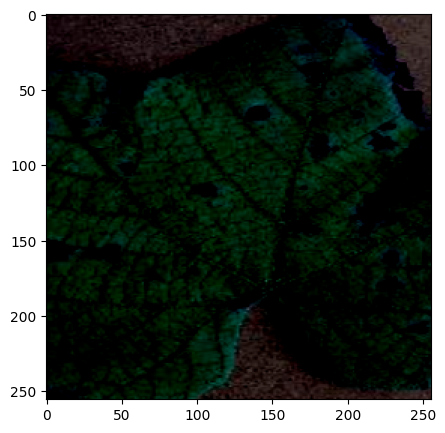

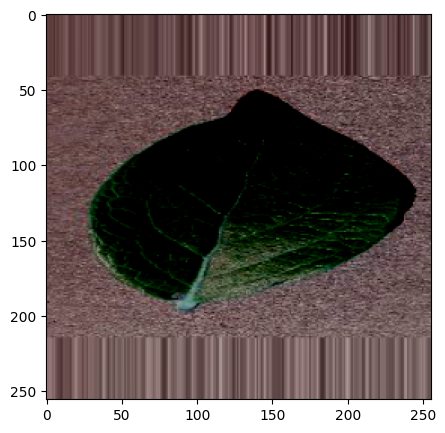

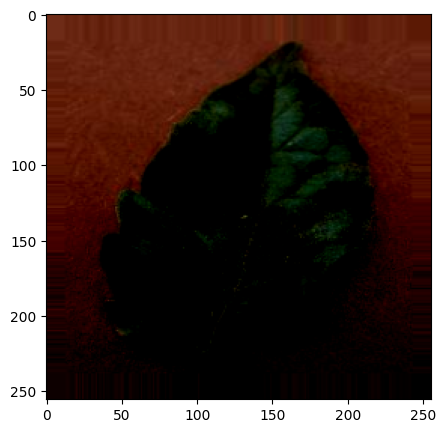

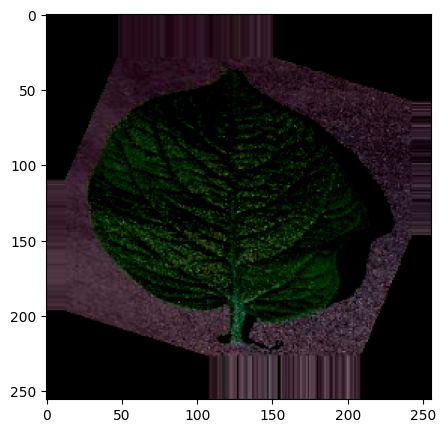

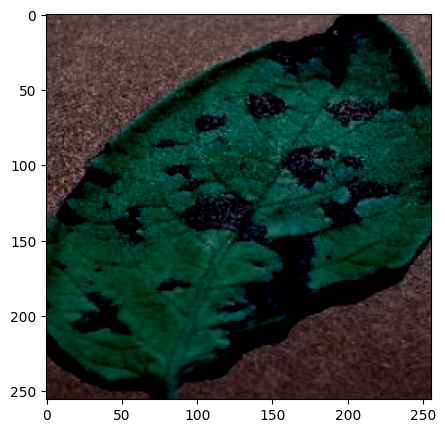

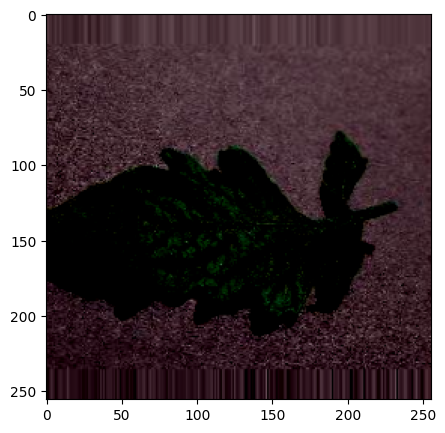

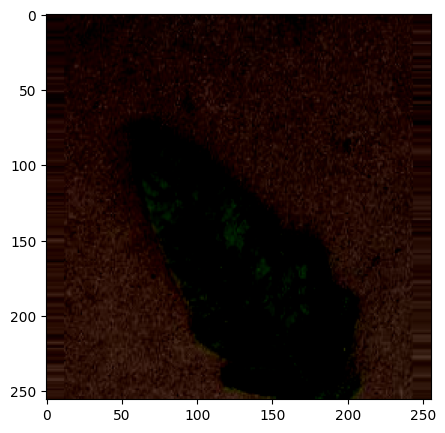

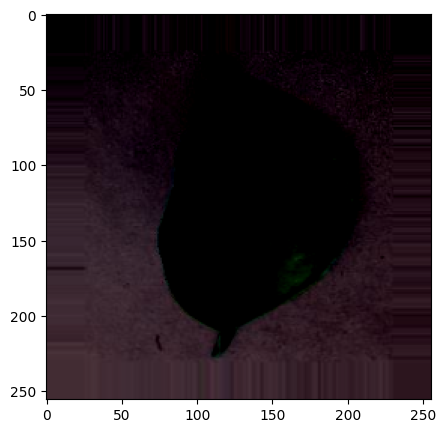

In [ ]:
def plotImage(img_arr,label):
  for im, l in zip(img_arr , label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/225)
    plt.show()

plotImage(t_img[:10], label[:10])

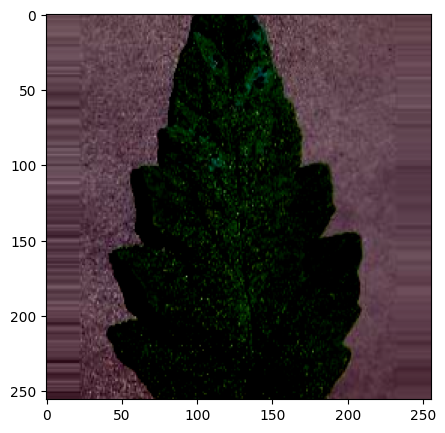

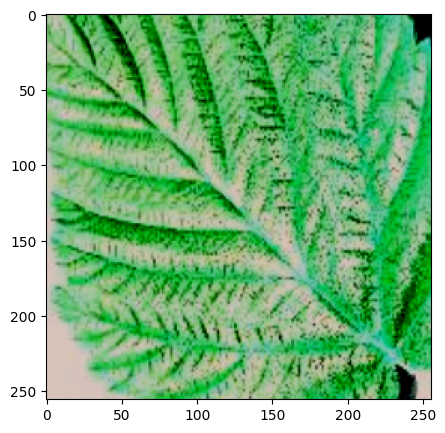

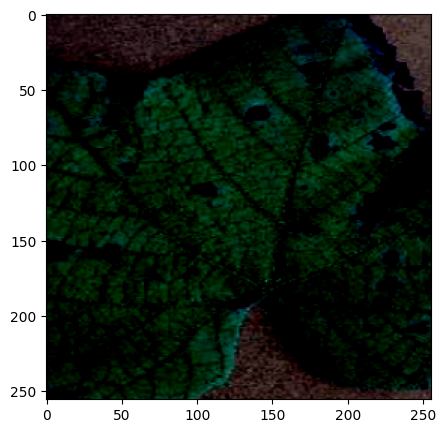

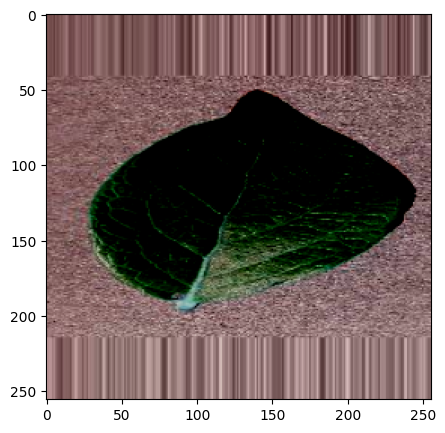

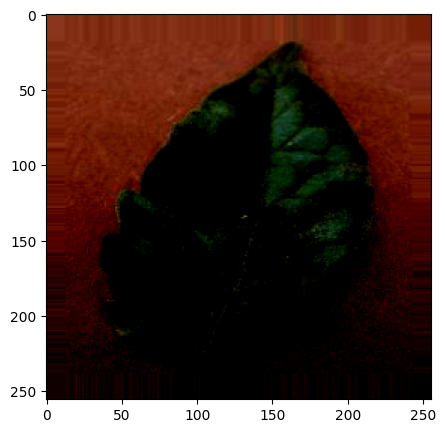

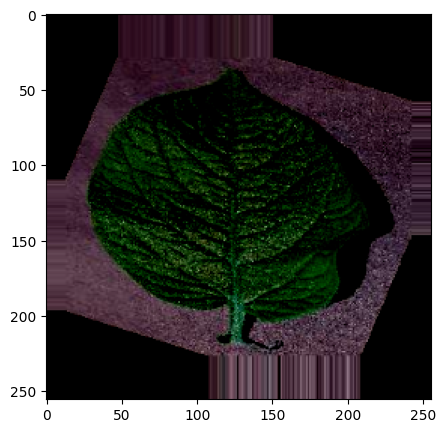

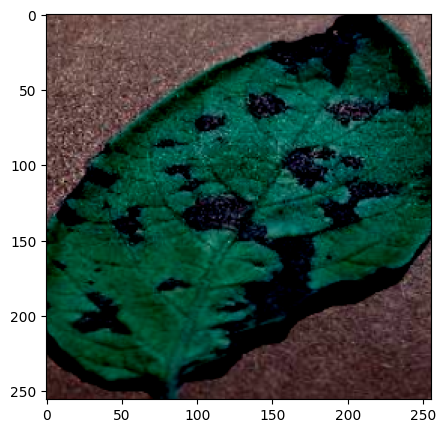

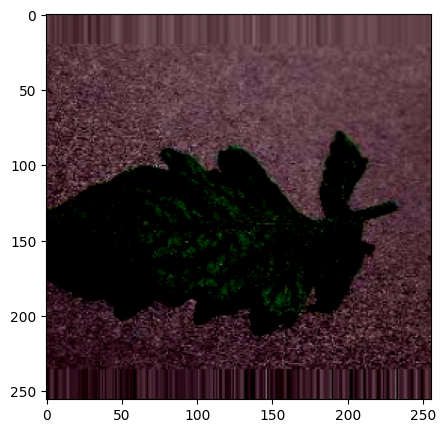

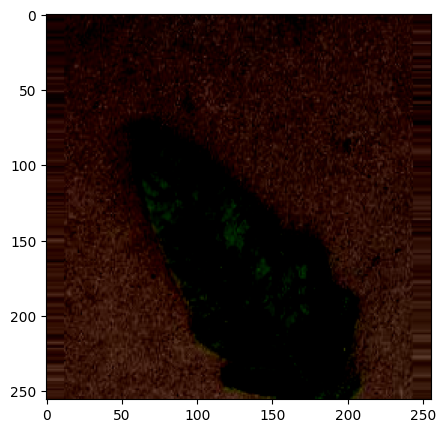

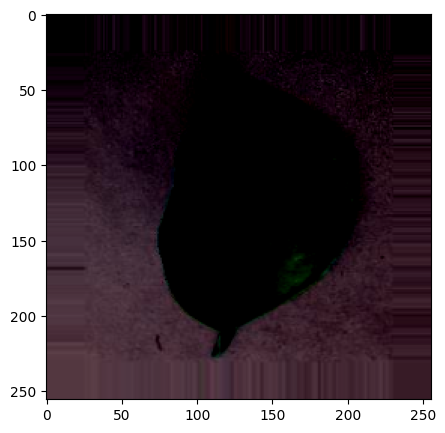

In [ ]:
def plotImage(img_arr,label):
  for im, l in zip(img_arr , label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/180)
    plt.show()

plotImage(t_img[:10], label[:10])

BUILDING A MODEL

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape=(256,256,3),include_top=False)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
x = Flatten()(base_model.output)
x= Dense(units = 38, activation='softmax')(x)
#creating model
model= Model( base_model.input, x)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [ ]:
model.compile(optimizer= 'adam', loss = keras.losses.categorical_crossentropy, metrics= ['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#Early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta = 0.01, patience =3, verbose =1)

#model check point
mc= ModelCheckpoint(filepath="best_model.h5",
                    monitor='val_accuracy',
                    min_delta = 0.01,
                    patience =3, verbose =1,
                    save_best_only=True)

cb = [es,mc]

In [ ]:
his = model.fit_generator(train,
                          steps_per_epoch = 16,
                          epochs =50,
                          verbose =1,
                          callbacks = cb,
                          validation_data =val,
                          validation_steps= 16)

<ipython-input-72-60c2c08cefe8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train,


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 31.5475 - accuracy: 0.1602 
Epoch 1: val_accuracy improved from -inf to 0.45703, saving model to best_model.h5
16/16 [==============================] - 522s 33s/step - loss: 31.5475 - accuracy: 0.1602 - val_loss: 14.9693 - val_accuracy: 0.4570
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 16.2415 - accuracy: 0.4199 
Epoch 2: val_accuracy improved from 0.45703 to 0.57422, saving model to best_model.h5
16/16 [==============================] - 508s 33s/step - loss: 16.2415 - accuracy: 0.4199 - val_loss: 11.8521 - val_accuracy: 0.5742
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 11.8755 - accuracy: 0.5176 
Epoch 3: val_accuracy improved from 0.57422 to 0.63281, saving model to best_model.h5
16/16 [==============================] - 511s 33s/step - loss: 11.8755 - accuracy: 0.5176 - val_loss: 8.7107 - val_accuracy: 0.6328
Epoch 4/50
16/16 [==============================] - ETA: 0s

In [ ]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

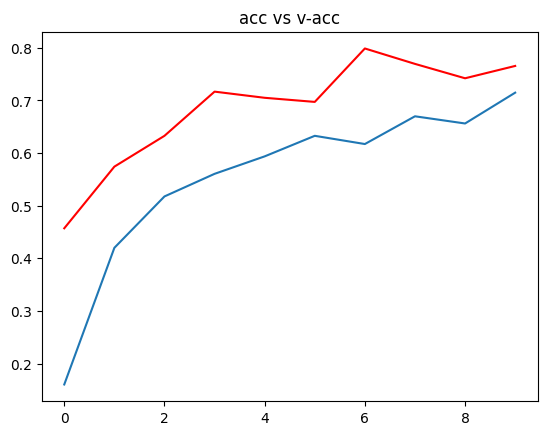

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c= "red")
plt.title("acc vs v-acc")
plt.show()

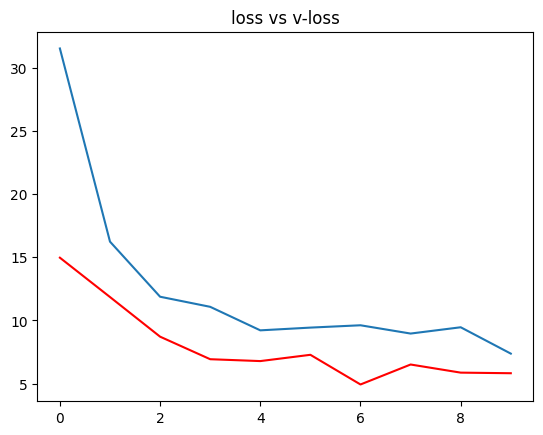

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c= "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
#load best model

from keras.models import load_model
model = load_model("/content/besta_model.h5")

In [ ]:
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))
ref

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
def prediction(path):
  img = load_img(path, target_size= (256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis =0)
  pred =np.argmax(model.predict(img))
  print(f" the image belongs to {ref[pred]}")

In [ ]:
path = "/content/drive/MyDrive/data/test/test/PotatoEarlyBlight1.JPG"
prediction(path)

1/1 [==============================] - 0s 21ms/step
 the image belongs to Potato___Early_blight


In [ ]:
path = "/content/drive/MyDrive/data/test/test/TomatoYellowCurlVirus3.JPG"
prediction(path)

1/1 [==============================] - 0s 20ms/step
 the image belongs to Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [ ]:
path = "/content/drive/MyDrive/data/test/test/PotatoHealthy1.JPG"
prediction(path)

1/1 [==============================] - 0s 25ms/step
 the image belongs to Potato___healthy


In [ ]:
path = "/content/drive/MyDrive/data/test/test/TomatoEarlyBlight3.JPG"
prediction(path)

1/1 [==============================] - 0s 22ms/step
 the image belongs to Tomato___Septoria_leaf_spot


In [ ]:
path = "/content/drive/MyDrive/data/test/test/AppleScab2.JPG"
prediction(path)

1/1 [==============================] - 0s 22ms/step
 the image belongs to Apple___Apple_scab
